# Assignment 2 - Elementary Differential Equations and Boundary Value Problems

한 학기 동안 배운 것을 Programming하기 위해 ODE Calculator를 직접 구현해보겠습니다.

전 Assignment에서 선형대수를 오픈 소스없이 직접 구현했기때문에, 이번 Assignment에서는 편의를 위해 numpy 및 여러 오픈 소스를 이용해서 구현해보겠습니다

# Chapter 1, Introduction

## 1.1 Some Basic Mathematical Models

이 Chapter에서는 거의 다루는 모델링을 하는 방법에 대해 다루고 있습니다. 구현할 부분은 거의 없기에 Skip하겠습니다.

## 1.2 Solutions of Some Differential Equations

이 Chapter에서는 가장 간단한 미분방정식인 $\frac{dy}{dt} = ay - b\$를 다루고 있습니다. 

이를 sympy를 이용해 대수적 Solution 구하는 프로그램을 구현해보겠습니다.

In [64]:
import sympy as sy
from sympy import init_printing

init_printing() 

t = sy.symbols('t')
f = sy.Function('f')
y = f(t)
eq = sy.Eq(sy.diff(y, t, 1) - 0.5 * y - 450, 0)

# 초기 조건: f(0) = 850 (예시로 지정)
initial_condition = {f(0): 850}

sol = sy.dsolve(eq, y, ics=initial_condition)

print("solution : ", end = "")
sol.rhs

solution : 

값을 numpy로 바꾸고, matroplotlib를 이용하면 시각화도 가능합니다.

In [65]:
import sympy as sy
import numpy as np
import matplotlib.pyplot as plt
from sympy import init_printing

init_printing(use_latex='mathjax')

t = sy.symbols('t')
f = sy.Function('f')
y = f(t)
eq = sy.Eq(sy.diff(y, t, 1) - 0.5 * y - 450, 0)

# 초기 조건: f(0) = 1 (예시로 지정)

initial_t = 0
initial_y = 850
#입력 받는 것으로 변경 가능

# 초기 조건: f(1) = 2 (예시로 지정)
initial_condition = {f(initial_t): initial_y}

sol = sy.dsolve(eq, y, ics=initial_condition)

print("solution : ", end = "")
sol.rhs

solution : 

        0.5⋅t        
1750.0⋅ℯ      - 900.0

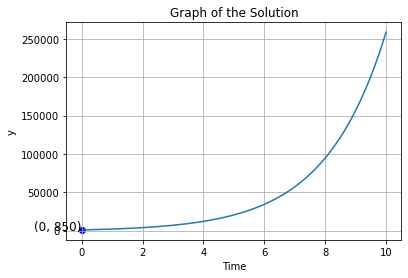

In [67]:
%matplotlib inline

# 해결된 결과 중에서 식 부분만 추출
sym_sol = sol.rhs

# SymPy 식을 NumPy 함수로 변환
num_sol = sy.lambdify(t, sym_sol, 'numpy')

# 그래프를 그리기 위한 t 값 배열 생성
t_values = np.linspace(0.1, 10, 100)

# t 값에 따른 y 값을 계산
y_values = num_sol(t_values)



# 그래프 그리기
plt.scatter(initial_t, initial_y, color='blue', marker='o')
plt.text(initial_t, initial_y, f'({initial_t}, {initial_y})', fontsize=12, ha='right')
plt.plot(t_values, y_values)
plt.xlabel('Time')
plt.ylabel('y')
plt.title('Graph of the Solution')
plt.grid(True)
plt.show()


## 1.3 Classification of Differential Equations

이 chapter에서는 미분방정식의 분류에 대해서 다룹니다. 구현할 부분이 마땅치 않아 skip하도록 하겠습니다